In [1]:
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

from math import sqrt
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

from keras.layers import LeakyReLU

from statistics import mean
from datetime import date
import datetime
import os
from sklearn.utils import check_array as check_arrays

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [2]:
# Create folder to save results in
identify = 'TimeSeriesCNNDaily_56'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
df = pd.read_csv('datasets/Dataset_DailyPlays_DomainFeatures.csv', sep=';', index_col=0, decimal=',')
df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

# Set dataset range
df_range = '160'
df = df.loc[:, :df_range]
df

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,608,601,636,612,608,594,599,634,567,621
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,705,756,705,667,734,687,713,757,706,774
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663


In [3]:
# Define dataset with songs to test on
list_of_test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - SeÃ±orita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  ] 

df_test = df.loc[list_of_test_songs]
df_test

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Katy Perry - Never Really Over,145,204,222,250,182,300,391,376,377,349,...,68,89,87,59,98,109,81,129,76,74
Taylor Swift - You Need To Calm Down,70,109,202,210,222,199,205,226,297,362,...,155,147,148,172,160,134,147,197,123,146
Shawn Mendes & Camila Cabello - SeÃ±orita,322,640,569,659,666,744,750,769,781,835,...,664,592,575,574,509,527,534,509,563,468
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,705,756,705,667,734,687,713,757,706,774
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,608,601,636,612,608,594,599,634,567,621
Meduza feat. Goodboys - Piece Of Your Heart,3,0,0,4,1,1,0,10,8,10,...,562,570,689,626,597,653,654,684,703,790
Pietro Lombardi - Nur Ein Tanz,23,36,31,42,46,41,55,55,58,55,...,9,6,7,11,9,8,7,8,7,6
Loud Luxury feat. brando - Body,8,0,2,1,0,1,5,13,3,5,...,39,41,41,46,55,40,42,36,41,42
Mark Forster - Sowieso,31,47,61,75,97,120,118,120,144,136,...,1207,1256,1157,1238,1175,1144,1336,1172,1186,1272
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,907,852,846,876,799,794,842,831,792,773


In [4]:
# Define dataset with songs to train on
df_train = df[~df.index.isin(list_of_test_songs)]
df_train

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,34,36,32,37,45,46,47,49,47,47
Chris Brown - Undecided,41,68,75,108,111,103,98,111,120,136,...,24,21,40,35,41,35,40,40,31,28


In [5]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 56
number_of_total_days = 140
n_steps_out = number_of_total_days - n_steps_in


# define the train data input and output
train_input_data = df_train.iloc[:, 0:n_steps_in]
train_output_data = df_train.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
train_input = array(train_input_data)
train_output = array(train_output_data)

# create scaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
#x_scaler = StandardScaler()
#y_scaler = StandardScaler()

# fit scaler on data
train_input = x_scaler.fit_transform(train_input)
train_output = y_scaler.fit_transform(train_output)

print("Input days: ", len(train_input[0])) 
print("Output days: ", len(train_output[0]))
print("Example of first song input data: ", train_input[0])
print("Example of first song output data: ", train_output[0])


Input days:  56
Output days:  84
Example of first song input data:  [0.06415094 0.04551724 0.08047493 0.06569343 0.16609784 0.16802444
 0.20682068 0.24659232 0.22529224 0.12899897 0.21546392 0.15384615
 0.20223577 0.28       0.22105263 0.28286015 0.27953586 0.32606325
 0.3012884  0.22156863 0.25652174 0.23733863 0.26130199 0.23396567
 0.1776824  0.18648208 0.24599832 0.1875     0.23318777 0.23032787
 0.22742475 0.19167389 0.2393968  0.14117647 0.14876033 0.17612688
 0.22922135 0.23240589 0.17166667 0.16450567 0.15553677 0.12048193
 0.10428016 0.12999217 0.13371151 0.13974895 0.13349321 0.1123506
 0.15303644 0.17455392 0.10380349 0.1541411  0.14463453 0.12555721
 0.12441315 0.20654716]
Example of first song output data:  [0.14834337 0.14383043 0.15789474 0.16271722 0.16958599 0.16905901
 0.21131186 0.18368963 0.25161812 0.18892508 0.1674277  0.23014587
 0.18779715 0.11195735 0.06338553 0.06571655 0.05942948 0.08715596
 0.08273667 0.08034321 0.19014627 0.1983346  0.23909657 0.19450801
 0

In [6]:
# Split test dataset into input and output days.

# define the test data input and output
test_input_data = df_test.iloc[:, 0:n_steps_in]
test_output_data = df_test.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
test_input = array(test_input_data)
test_output = array(test_output_data)

# transform data
test_input = x_scaler.transform(test_input)

print("Input days: ", len(test_input[0])) 
print("Output days: ", len(test_output[0]))
print("Example of first song input data: ", test_input[0])
print("Example of first song output data: ", test_output[0])

Input days:  56
Output days:  84
Example of first song input data:  [0.27169811 0.28137931 0.29287599 0.30413625 0.20705347 0.30549898
 0.43014301 0.46592317 0.40063762 0.36016512 0.4185567  0.44046365
 0.42378049 0.42555556 0.42526316 0.47634069 0.41772152 0.5997819
 0.43904856 0.56470588 0.48586957 0.52631579 0.49276673 0.53026197
 0.47296137 0.50732899 0.50631845 0.44724026 0.57117904 0.55409836
 0.52508361 0.56027754 0.64844486 0.53109244 0.47272727 0.5542571
 0.61854768 0.52209493 0.5775     0.54619125 0.54691462 0.5253012
 0.51361868 0.55050901 0.53403566 0.54476987 0.53317346 0.52988048
 0.56923077 0.59038014 0.59984152 0.55138037 0.6251944  0.5936107
 0.57746479 0.61808262]
Example of first song output data:  [782 826 771 774 696 728 672 739 710 711 700 773 755 737 731 781 780 835
 760 799 775 712 701 732 724 657 709 697 649 671 627 619 681 489 572 582
 521 516 523 457 422 440 442 428 362 415 410 407 360 424 375 350 340 343
 327 192 239 193 193 207 214 164 133 215 173 156 200 1

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
train_input = train_input.reshape((train_input.shape[0], train_input.shape[1], n_features))
test_input = test_input.reshape((test_input.shape[0], n_steps_in, n_features))

# define model
# CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, strides=1, input_shape=(n_steps_in, n_features)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')



history = model.fit(train_input, train_output, epochs=10000, batch_size=9, validation_data=(test_input, test_output), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

yhat = history

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 86 samples, validate on 10 samples
Epoch 1/10000
86/86 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 443136.7438
Epoch 2/10000
86/86 [==============================] - 0s 226us/step - loss: 0.0990 - val_loss: 442861.9031
Epoch 3/10000
86/86 [==============================] - 0s 218us/step - loss: 0.0662 - val_loss: 442815.3063
Epoch 4/10000
86/86 [==============================] - 0s 213us/step - loss: 0.0488 - val_loss: 442723.3125
Epoch 5/10000
86/86 [==============================] - 0s 238us/step - loss: 0.0394 - val_loss: 442702.4125
Epoch 6/10000
86/86 [==============================] - 0s 235us/step - loss: 0.0349 - val_loss: 442694.5969
Epoch 7/10000
86/86 [==============================] - 0s 208us/step - loss: 0.0319 - val_loss: 442694.0344
Epoch 8/10000
86/86 [==============================] - 0s 261us/step - loss: 0.029

In [8]:
# demonstrate prediction
yhat = model.predict(test_input, verbose=0)
print("predicticted time series output: ", yhat)

# transform data back to original scale
yhat = y_scaler.inverse_transform(yhat)

# Define the first expected and predicted
expected = test_output[0]
predictions = yhat[0]
print("Expected time series output: ", expected)
print("Predicted time series output: ", predictions)

predicticted time series output:  [[ 4.98120785e-01  5.80786347e-01  5.72705626e-01  5.13972402e-01
   5.65743506e-01  5.12643635e-01  6.10826850e-01  5.88741541e-01
   5.90406656e-01  5.76233923e-01  5.60527742e-01  6.49690449e-01
   5.37868619e-01  4.88466114e-01  5.91756284e-01  5.28636813e-01
   6.18324459e-01  6.15076542e-01  5.68026662e-01  5.50448060e-01
   5.85988879e-01  6.17710054e-01  5.85341692e-01  6.07584417e-01
   5.97775221e-01  5.37814498e-01  5.88485718e-01  5.83917856e-01
   5.73879302e-01  6.13294005e-01  5.27473390e-01  5.87602079e-01
   5.43786645e-01  5.73116839e-01  6.08931363e-01  5.28215528e-01
   5.73003769e-01  5.60174346e-01  6.65318727e-01  5.45307159e-01
   6.06633782e-01  5.55328369e-01  5.72532296e-01  6.19941533e-01
   5.71153045e-01  5.41251719e-01  5.84755182e-01  5.85548222e-01
   5.37223160e-01  5.03110945e-01  5.59103310e-01  5.64798892e-01
   5.53129554e-01  5.48296094e-01  6.89512610e-01  5.12061775e-01
   5.74587822e-01  5.63175023e-01  6.50069

In [9]:
# Create variable for each song, used to compare predicted and true value
lst1 = [test_output[0], yhat[0]]
lst2 = [test_output[1], yhat[1]]
lst3 = [test_output[2], yhat[2]]
lst4 = [test_output[3], yhat[3]]
lst5 = [test_output[4], yhat[4]]
lst6 = [test_output[5], yhat[5]]
lst7 = [test_output[6], yhat[6]]
lst8 = [test_output[7], yhat[7]]
lst9 = [test_output[8], yhat[8]]
lst10 = [test_output[9], yhat[9]]

# Set value for labelling
daysOrWeeks = 'Days'

# Make dataset of test song variables
df1 = pd.DataFrame(lst1).T
df1.columns = ['True', 'Predicted']
df1[daysOrWeeks] = df1.index + n_steps_in
df1.set_index(daysOrWeeks,inplace=True)

df2 = pd.DataFrame(lst2).T
df2.columns = ['True', 'Predicted']
df2[daysOrWeeks] = df2.index + n_steps_in
df2.set_index(daysOrWeeks,inplace=True)

df3 = pd.DataFrame(lst3).T
df3.columns = ['True', 'Predicted']
df3[daysOrWeeks] = df3.index + n_steps_in
df3.set_index(daysOrWeeks,inplace=True)

df4 = pd.DataFrame(lst4).T
df4.columns = ['True', 'Predicted']
df4[daysOrWeeks] = df4.index + n_steps_in
df4.set_index(daysOrWeeks,inplace=True)

df5 = pd.DataFrame(lst5).T
df5.columns = ['True', 'Predicted']
df5[daysOrWeeks] = df5.index + n_steps_in
df5.set_index(daysOrWeeks,inplace=True)

df6 = pd.DataFrame(lst6).T
df6.columns = ['True', 'Predicted']
df6[daysOrWeeks] = df6.index + n_steps_in
df6.set_index(daysOrWeeks,inplace=True)

df7 = pd.DataFrame(lst7).T
df7.columns = ['True', 'Predicted']
df7[daysOrWeeks] = df7.index + n_steps_in
df7.set_index(daysOrWeeks,inplace=True)

df8 = pd.DataFrame(lst8).T
df8.columns = ['True', 'Predicted']
df8[daysOrWeeks] = df8.index + n_steps_in
df8.set_index(daysOrWeeks,inplace=True)

df9 = pd.DataFrame(lst9).T
df9.columns = ['True', 'Predicted']
df9[daysOrWeeks] = df9.index + n_steps_in
df9.set_index(daysOrWeeks,inplace=True)

df10 = pd.DataFrame(lst10).T
df10.columns = ['True', 'Predicted']
df10[daysOrWeeks] = df10.index + n_steps_in
df10.set_index(daysOrWeeks,inplace=True)


In [10]:
# Forecast Error (or Residual Forecast Error)
forecast_errors = [test_output[i]-yhat[i] for i in range(len(test_output))]  

df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_square_percentage_error(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
    return loss

for i in range(len(test_output)):
    print(list_of_test_songs[i])

    # Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
    bias = mean(forecast_errors[i])
    mae = mean(abs(forecast_errors[i]))
    mape = mean_absolute_percentage_error(test_output[i], yhat[i])
    mse = mean_squared_error(test_output[i], yhat[i]) 
    rmse = sqrt(mse)
    rmspe = root_mean_square_percentage_error(test_output[i], yhat[i])
    df_result = df_result.append({'Date': date.today(),'Song': list_of_test_songs[i], 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days}, ignore_index=True)
    
    print('Bias: %f' % bias)
    print('MAE: %f' % mae)
    print('MAPE: %f'% mape)
    print('MSE: %f' % mse)
    print('RMSE: %f' % rmse)
    print('RMSPE %f' % rmspe)
    print('_________________________')

# Create datetime for time of results
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

# Save Results to csv file in folder
#df_result.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )

df_result


Katy Perry - Never Really Over
Bias: -245.172437
MAE: 266.644938
MAPE: 132.651540
MSE: 107552.372870
RMSE: 327.951784
RMSPE 199.368583
_________________________
Taylor Swift - You Need To Calm Down
Bias: -69.300007
MAE: 91.804435
MAPE: 23.602073
MSE: 13647.176999
RMSE: 116.821133
RMSPE 34.314874
_________________________
Shawn Mendes & Camila Cabello - SeÃ±orita
Bias: -33.139499
MAE: 132.627446
MAPE: 13.942386
MSE: 28129.898611
RMSE: 167.719703
RMSPE 18.571200
_________________________
Ava Max - So Am I
Bias: -28.794767
MAE: 83.929685
MAPE: 9.746721
MSE: 10520.592741
RMSE: 102.569941
RMSPE 12.539767
_________________________
Andreas Bourani - Auf uns
Bias: 147.360644
MAE: 156.958642
MAPE: 27.840910
MSE: 35091.760058
RMSE: 187.327948
RMSPE 30.955082
_________________________
Meduza feat. Goodboys - Piece Of Your Heart
Bias: 68.579101
MAE: 98.769731
MAPE: 33.196489
MSE: 20467.553218
RMSE: 143.064857
RMSPE 40.670511
_________________________
Pietro Lombardi - Nur Ein Tanz
Bias: -40.569374

,Song,Date,Bias,MAE,MAPE,MSE,RMSE,RMSPE,Predict_from,Predict_to
0,Katy Perry - Never Really Over,2020-06-06,-245.1724,266.6449,132.6515,107552.3729,327.9518,199.3686,56,140
1,Taylor Swift - You Need To Calm Down,2020-06-06,-69.3000,91.8044,23.6021,13647.1770,116.8211,34.3149,56,140
2,Shawn Mendes & Camila Cabello - SeÃ±orita,2020-06-06,-33.1395,132.6274,13.9424,28129.8986,167.7197,18.5712,56,140
3,Ava Max - So Am I,2020-06-06,-28.7948,83.9297,9.7467,10520.5927,102.5699,12.5398,56,140
4,Andreas Bourani - Auf uns,2020-06-06,147.3606,156.9586,27.8409,35091.7601,187.3279,30.9551,56,140
5,Meduza feat. Goodboys - Piece Of Your Heart,2020-06-06,68.5791,98.7697,33.1965,20467.5532,143.0649,40.6705,56,140
6,Pietro Lombardi - Nur Ein Tanz,2020-06-06,-40.5694,42.7260,372.8751,2450.6565,49.5041,529.2261,56,140
7,Loud Luxury feat. brando - Body,2020-06-06,-29.4396,33.1881,246.9751,1640.1963,40.4993,309.4867,56,140
8,Mark Forster - Sowieso,2020-06-06,142.2132,173.4311,18.4360,54471.1517,233.3906,22.8074,56,140
9,Camila Cabello feat. Young Thug - Havana,2020-06-06,58.1759,71.7113,7.8384,8817.2218,93.9001,10.0181,56,140


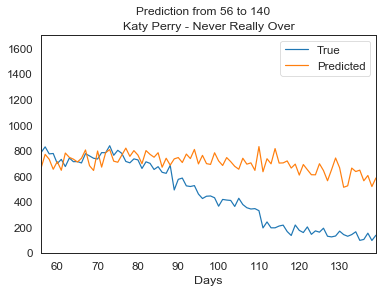

Song:  Katy Perry - Never Really Over
Prediction from 56 to 140
________________________________________________________________


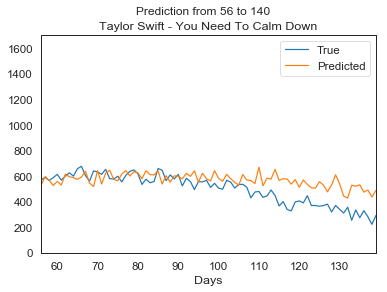

Song:  Taylor Swift - You Need To Calm Down
Prediction from 56 to 140
________________________________________________________________


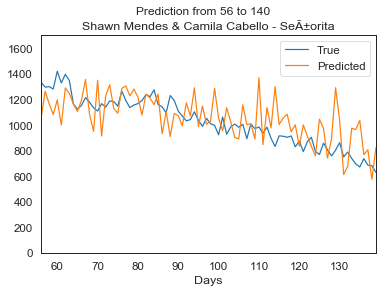

Song:  Shawn Mendes & Camila Cabello - SeÃ±orita
Prediction from 56 to 140
________________________________________________________________


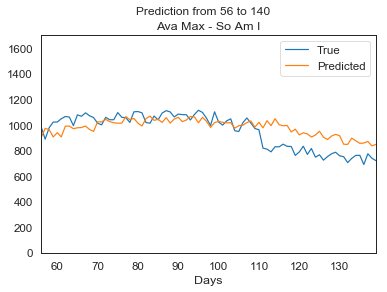

Song:  Ava Max - So Am I
Prediction from 56 to 140
________________________________________________________________


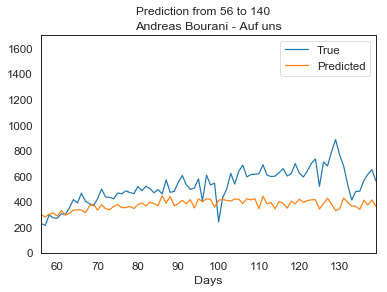

Song:  Andreas Bourani - Auf uns
Prediction from 56 to 140
________________________________________________________________


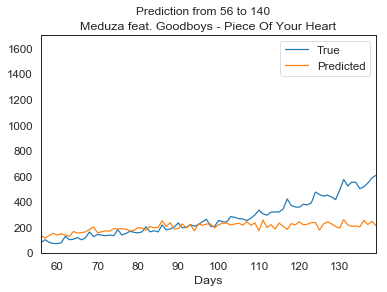

Song:  Meduza feat. Goodboys - Piece Of Your Heart
Prediction from 56 to 140
________________________________________________________________


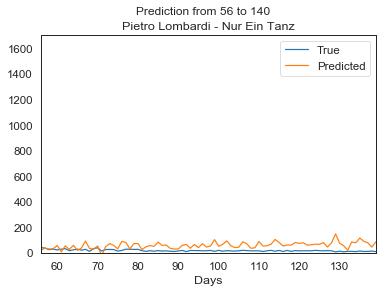

Song:  Pietro Lombardi - Nur Ein Tanz
Prediction from 56 to 140
________________________________________________________________


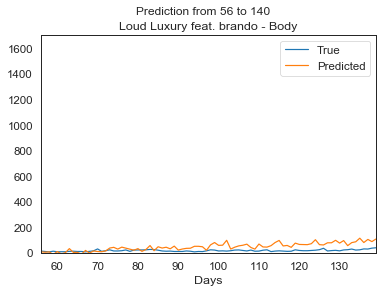

Song:  Loud Luxury feat. brando - Body
Prediction from 56 to 140
________________________________________________________________


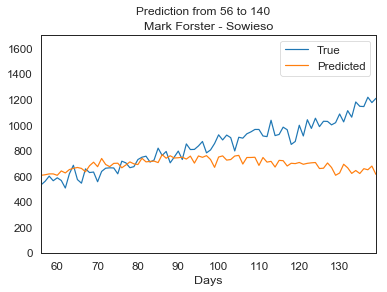

Song:  Mark Forster - Sowieso
Prediction from 56 to 140
________________________________________________________________


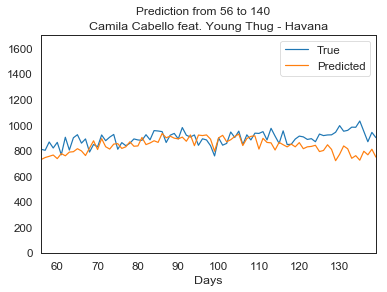

Song:  Camila Cabello feat. Young Thug - Havana
Prediction from 56 to 140
________________________________________________________________


In [11]:
# Define plotting of graphs and saving them to folder
import matplotlib.pyplot as plt 

pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
fig_size = 1700

df1.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[0])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[0]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[0])
print(pred_title)
print('________________________________________________________________')

df2.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[1])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[1]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[1])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df3.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[2])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[2]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[2])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df4.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[3])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[3]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[3])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df5.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[4])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[4]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[4])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df6.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[5])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[5]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[5])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df7.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[6])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[6]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[6])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df8.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[7])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[7]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[7])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df9.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[8])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[8]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[8])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')

df10.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[9])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[9]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[9])
print("Prediction from", n_steps_in, "to", number_of_total_days)
print('________________________________________________________________')
